#### Write a small paragraph describing the dataset that you choose, its features, number ofinstances, nature of the data, and anything else that you found to be interesting.

I have chosen the poular <b>Haberman's</b> dataset for this assignment. Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.
There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

    1)Number of Axillary nodes(Lymph Nodes)
    2)Age
    3)Operation Year
    4)Survival Status

<b>Lymph Node</b>: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading

<b>Age</b>: It represent the age of patient at which they undergone surgery (age from 30 to 83)

<b>Operation year</b>: Year in which patient was undergone surgery(1958–1969)

<b>Survival Status</b>: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.



#### Provide  a  brief  analysis  of  the  dataset  you  downloaded.   Does  it  have  missing  data?Are the features numeric/discrete/categorical?  Create some histograms/boxplots/othervisualizations to illustrate the content o the dataset.

There is no missing data. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import io
from scipy import misc
import collections
from sklearn import tree
from sklearn.tree import export_graphviz

In [47]:
haberman = pd.read_csv('haberman.csv',names = ["Age","Operation Year","Number_of_Axillary_nodes","Survival_Status"], sep= ',', header= None)

In [48]:
# print(haberman.columns)
print (haberman.shape)

(306, 4)


In [49]:
haberman.head()

,Age,Operation Year,Number_of_Axillary_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [50]:
haberman.describe(include="all")

,Age,Operation Year,Number_of_Axillary_nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [51]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

225 Patients out of 306 survived more than five years. 81 survived less than five years.

In [52]:
haberman["Survival_Status"] =  haberman["Survival_Status"].astype('category')

In [53]:
haberman.dtypes

Age                            int64
Operation Year                 int64
Number_of_Axillary_nodes       int64
Survival_Status             category
dtype: object

The datatypes are shown above.

Scatter plot of Age vs No of Auxillary Nodes is shown below

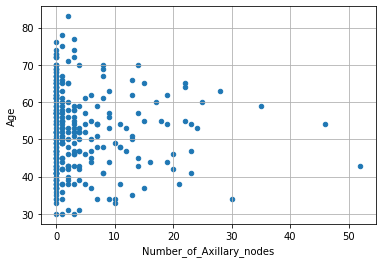

In [54]:
haberman.plot(kind="scatter", x="Number_of_Axillary_nodes", y="Age") 
plt.grid()
plt.show()

Scatter plot of Age and Operation Year is shown below

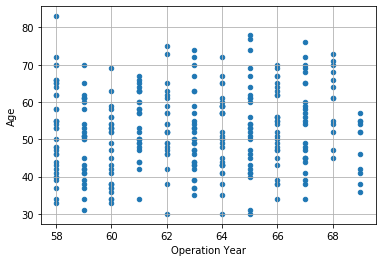

In [55]:
haberman.plot(kind="scatter", y="Age", x="Operation Year") 
plt.grid()
plt.show()

Probability Distribution Function of Age

D:\Data\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


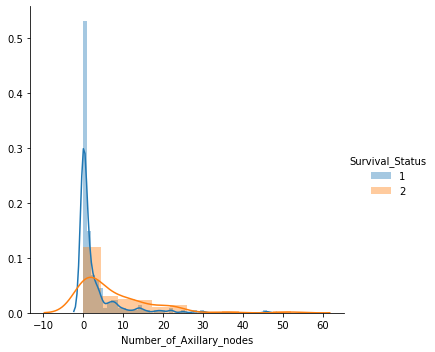

In [56]:
sns.FacetGrid(haberman,hue="Survival_Status", size=5)\
.map(sns.distplot,"Number_of_Axillary_nodes")\
.add_legend()

Facet Grid Shows the age of people surviving > 5 years vs < 5 years

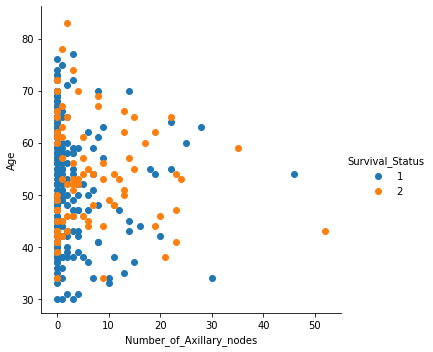

In [57]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(plt.scatter, "Number_of_Axillary_nodes", "Age") \
   .add_legend()

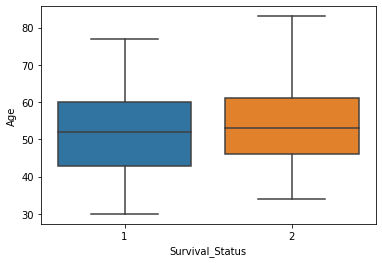

In [58]:
sns.boxplot(x="Survival_Status", y="Age", data=haberman)

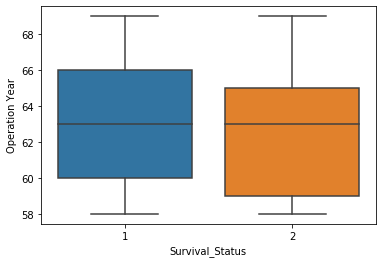

In [59]:
sns.boxplot(x="Survival_Status", y="Operation Year", data=haberman)

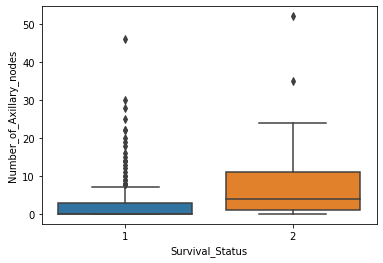

In [60]:
sns.boxplot(x="Survival_Status", y="Number_of_Axillary_nodes", data=haberman)

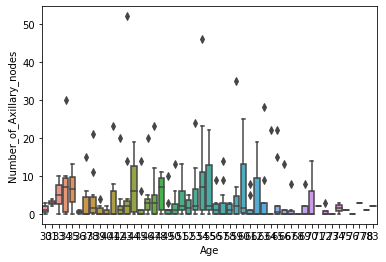

In [61]:
sns.boxplot(x="Age", y="Number_of_Axillary_nodes", data=haberman)

Pair Plot 

D:\Data\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\Data\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Data\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


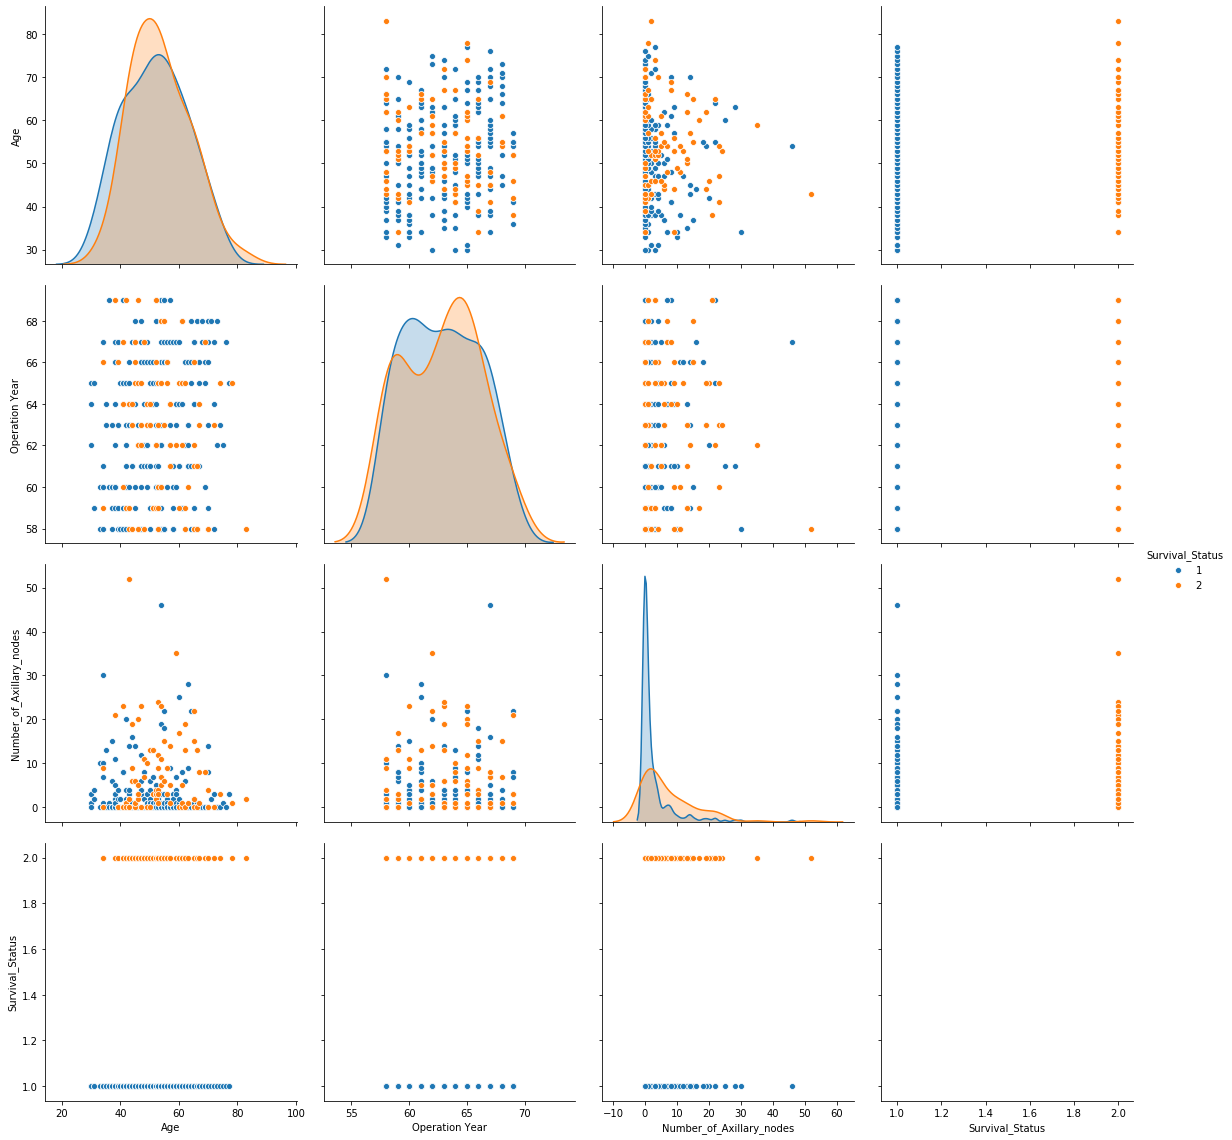

In [62]:
sns.pairplot(haberman, hue="Survival_Status", size=4)

Parallel Coordinates plot 

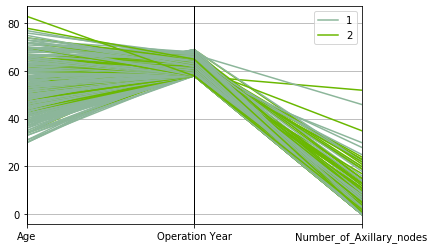

In [63]:
parallel_coordinates(haberman, "Survival_Status")

Violin Plot

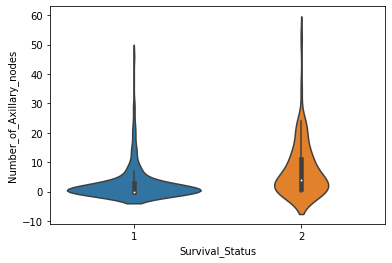

In [64]:
sns.violinplot(x="Survival_Status", y="Number_of_Axillary_nodes",data=haberman)
plt.legend
plt.show()

#### Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can beused to generate predicions for your data

In [65]:
X = haberman.values[:, :3]
Y = haberman.values[:,3]

In [66]:
X

array([[30, 64, 1],
       [30, 62, 3],
       [30, 65, 0],
       [31, 59, 2],
       [31, 65, 4],
       [33, 58, 10],
       [33, 60, 0],
       [34, 59, 0],
       [34, 66, 9],
       [34, 58, 30],
       [34, 60, 1],
       [34, 61, 10],
       [34, 67, 7],
       [34, 60, 0],
       [35, 64, 13],
       [35, 63, 0],
       [36, 60, 1],
       [36, 69, 0],
       [37, 60, 0],
       [37, 63, 0],
       [37, 58, 0],
       [37, 59, 6],
       [37, 60, 15],
       [37, 63, 0],
       [38, 69, 21],
       [38, 59, 2],
       [38, 60, 0],
       [38, 60, 0],
       [38, 62, 3],
       [38, 64, 1],
       [38, 66, 0],
       [38, 66, 11],
       [38, 60, 1],
       [38, 67, 5],
       [39, 66, 0],
       [39, 63, 0],
       [39, 67, 0],
       [39, 58, 0],
       [39, 59, 2],
       [39, 63, 4],
       [40, 58, 2],
       [40, 58, 0],
       [40, 65, 0],
       [41, 60, 23],
       [41, 64, 0],
       [41, 67, 0],
       [41, 58, 0],
       [41, 59, 8],
       [41, 59, 0],
       [41, 

In [67]:
Y

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,

In [68]:
X=X.astype('int')
Y=Y.astype('int')

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.35, random_state = 100)

In [114]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=3, min_samples_leaf=5)
clf = clf_gini.fit(X_train, y_train)

In [115]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [116]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1])

In [117]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1])

In [118]:
print ("Decision Tree with gini index as the criteria has accuracy: ", accuracy_score(y_test,y_pred)*100)

Decision Tree with gini index as the criteria has accuracy:  65.74074074074075


In [119]:
print ("Decision Tree with Entropy index as the criteria has accuracy: ", accuracy_score(y_test,y_pred_en)*100)

Decision Tree with Entropy index as the criteria has accuracy:  76.85185185185185


#### The link above explains how you can generate a visual output for the tree you just trained.Use that code snippet to create a visualization of your tree.

In [120]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [122]:
# Visualize data
import pydotplus
import collections
from sklearn import tree
data_feature_names = ["Number of Axillary nodes", "Age", "Operation Year"]
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Tree1.png')

True

#### Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [94]:
clf.predict([[100,66, 100]])

array([1])

In [95]:
clf_gini_new = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf = clf_gini_new.fit(X_train, y_train)

In [96]:
clf_entropy_new = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy_new.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [97]:
y_pred_new = clf_gini_new.predict(X_test)
y_pred_new

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1])

In [98]:
y_pred_en_new = clf_entropy_new.predict(X_test)
y_pred_en_new

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1])

In [99]:
print ("Decision Tree with gini index as the criteria has accuracy", accuracy_score(y_test,y_pred_new)*100)

Accuracy for decision tree with gini index as criteria is  67.5925925925926


In [111]:
print ("Decision Tree with entrpy index as the criteria has accuracy", accuracy_score(y_test,y_pred_en_new)*100)

Decision Tree with entrpy index as the criteria has accuracy 67.5925925925926


There is was  change in the accuracy(~20 pecent) when we chage the parameters 

In [123]:
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["Number of Axillary nodes", "Age", "Operation Year"]
class_name = ["Class Name"]
dot_data = tree.export_graphviz(clf_gini_new,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Tree2.png')

True

In [124]:
# NUmber of lymph : 12, Age : 10, Operation year : 60
clf_gini_new.predict([[10,60 , 12]])

array([1])

In [125]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 7}
Best score is 73.73737373737373


D:\Data\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


From the image attached Tree2.png we can see that the depth of graph is very significantly increased which slightly went agains tmy intuition but supported the fact that there was some improvement in the accuracy

In [126]:
# NUmber of lymph : 10, Age : 10, Operation year : 1
clf_gini_new.predict([[10,10 ,1]])

array([1])

Hyperparameters are tuned using RandomizedSearchCV 

In [127]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best Score {}".format(tree_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 6}
Best Score 72.72727272727273


D:\Data\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
